In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the metadata
data_path = Path("../data/plantvillage_images_metadata.parquet")
df = pd.read_parquet(data_path)

print(f"Dataset loaded successfully!")
print(f"Total images: {len(df):,}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")


Dataset loaded successfully!
Total images: 108,610

Dataset shape: (108610, 9)

Columns: ['image_path', 'image_type', 'plant_type', 'condition', 'file_size_bytes', 'width', 'height', 'file_size_kb', 'file_size_mb']


In [8]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,image_path,image_type,plant_type,condition,file_size_bytes,width,height,file_size_kb,file_size_mb
0,data/plantvillage dataset/grayscale/Strawberry...,grayscale,Strawberry,healthy,20310,256,256,19.833984,0.019369
1,data/plantvillage dataset/grayscale/Strawberry...,grayscale,Strawberry,healthy,20650,256,256,20.166016,0.019693
2,data/plantvillage dataset/grayscale/Strawberry...,grayscale,Strawberry,healthy,17905,256,256,17.485352,0.017076
3,data/plantvillage dataset/grayscale/Strawberry...,grayscale,Strawberry,healthy,20219,256,256,19.745117,0.019282
4,data/plantvillage dataset/grayscale/Strawberry...,grayscale,Strawberry,healthy,20746,256,256,20.259766,0.019785


In [ ]:
# Basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\n" + "="*80)
print("\nBasic Statistics:")
df.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108610 entries, 0 to 108609
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   image_path       108610 non-null  object 
 1   image_type       108610 non-null  object 
 2   plant_type       108610 non-null  object 
 3   condition        108610 non-null  object 
 4   file_size_bytes  108610 non-null  int64  
 5   width            108610 non-null  int64  
 6   height           108610 non-null  int64  
 7   file_size_kb     108610 non-null  float64
 8   file_size_mb     108610 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 7.5+ MB
None


Basic Statistics:


,file_size_bytes,width,height,file_size_kb,file_size_mb
count,108610.000000,108610.0,108610.0,108610.000000,108610.000000
mean,15346.104254,256.0,256.0,14.986430,0.014635
std,4420.420254,0.0,0.0,4.316817,0.004216
min,3284.000000,256.0,256.0,3.207031,0.003132
25%,11977.000000,256.0,256.0,11.696289,0.011422
50%,15633.500000,256.0,256.0,15.267090,0.014909
75%,18720.000000,256.0,256.0,18.281250,0.017853
max,121652.000000,256.0,256.0,118.800781,0.116016


In [ ]:
# Image type distribution
print("Image Type Distribution:")
image_type_counts = df['image_type'].value_counts()
print(image_type_counts)
print(f"\nPercentage distribution:")
print(df['image_type'].value_counts(normalize=True) * 100)


Image Type Distribution:
image_type
grayscale    54305
color        54305
Name: count, dtype: int64

Percentage distribution:
image_type
grayscale    50.0
color        50.0
Name: proportion, dtype: float64


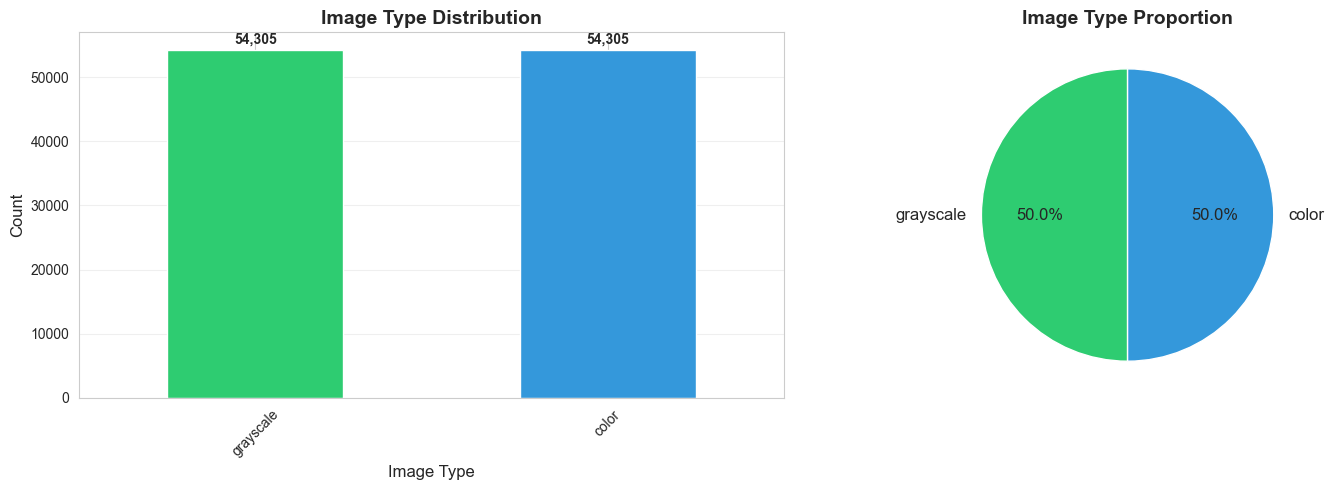

In [ ]:
# Visualize image type distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
image_type_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#3498db', '#e74c3c'])
axes[0].set_title('Image Type Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Image Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(image_type_counts):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[1].pie(image_type_counts, labels=image_type_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Image Type Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# Plant type distribution
print("Plant Type Distribution:")
plant_type_counts = df['plant_type'].value_counts()
print(plant_type_counts)
print(f"\nTotal unique plant types: {df['plant_type'].nunique()}")


Plant Type Distribution:
plant_type
Tomato                     36320
Orange                     11014
Soybean                    10180
Grape                       8124
Corn_(maize)                7704
Apple                       6342
Peach                       5314
Pepper,_bell                4950
Potato                      4304
Cherry_(including_sour)     3812
Squash                      3670
Strawberry                  3130
Blueberry                   3004
Raspberry                    742
Name: count, dtype: int64

Total unique plant types: 14


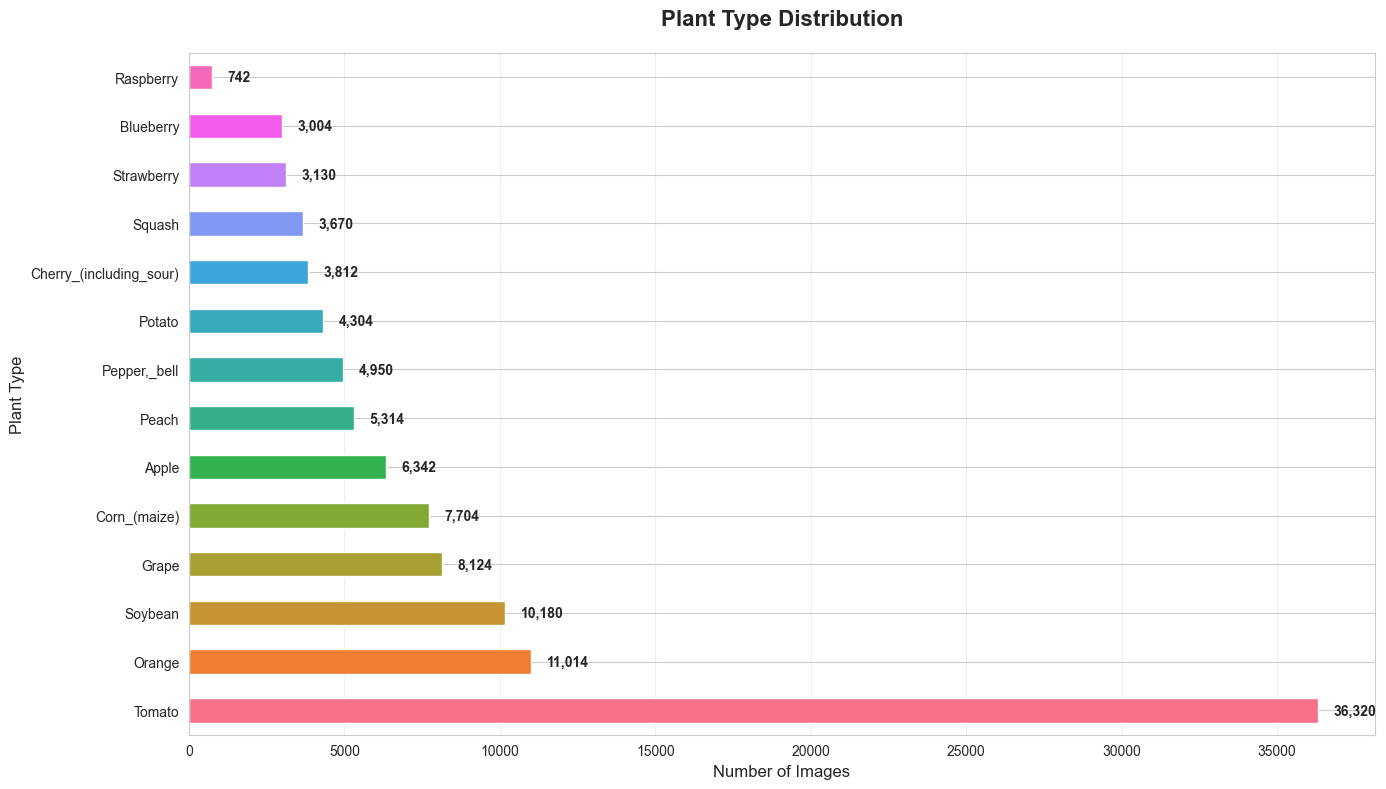

In [ ]:
# Visualize plant type distribution
plt.figure(figsize=(14, 8))
colors_palette = sns.color_palette("husl", len(plant_type_counts))
plant_type_counts.plot(kind='barh', color=colors_palette)
plt.title('Plant Type Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Plant Type', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(plant_type_counts):
    plt.text(v + 500, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


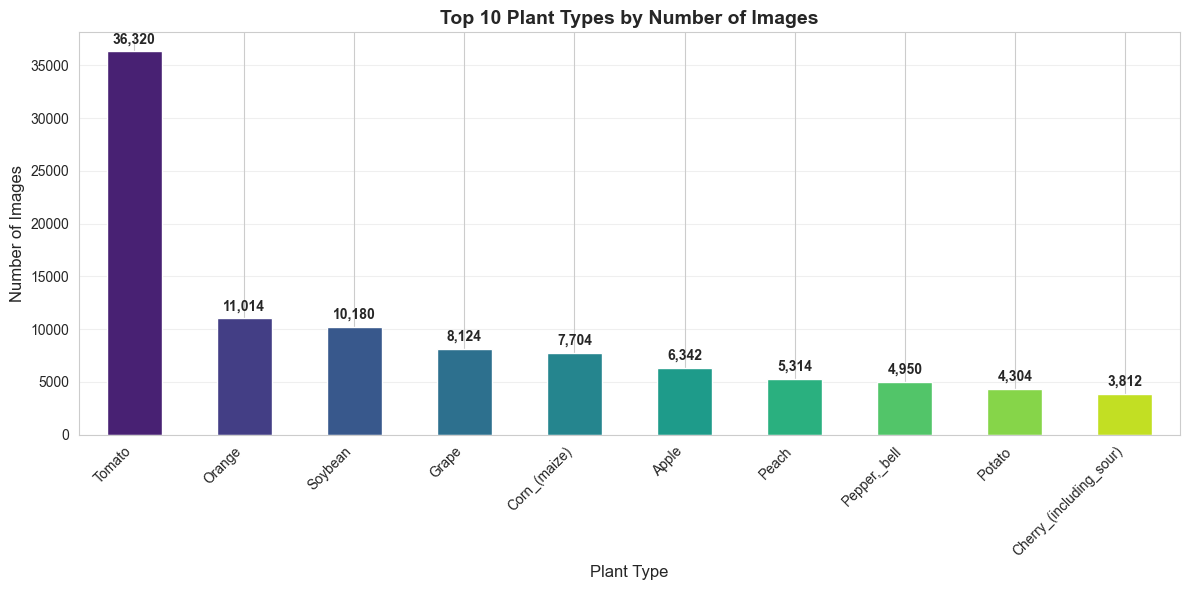

In [ ]:
# Top 10 plant types
plt.figure(figsize=(12, 6))
top_10_plants = plant_type_counts.head(10)
colors = sns.color_palette("viridis", 10)
top_10_plants.plot(kind='bar', color=colors)
plt.title('Top 10 Plant Types by Number of Images', fontsize=14, fontweight='bold')
plt.xlabel('Plant Type', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(top_10_plants):
    plt.text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# Condition distribution
print("Condition Distribution:")
condition_counts = df['condition'].value_counts()
print(condition_counts)
print(f"\nTotal unique conditions: {df['condition'].nunique()}")


Condition Distribution:
condition
healthy                                 30168
Haunglongbing_(Citrus_greening)         11014
Bacterial_spot                          10842
Tomato_Yellow_Leaf_Curl_Virus           10714
Late_blight                              5818
Powdery_mildew                           5774
Early_blight                             4000
Black_rot                                3602
Septoria_leaf_spot                       3542
Spider_mites Two-spotted_spider_mite     3352
Target_Spot                              2808
Esca_(Black_Measles)                     2766
Common_rust_                             2384
Leaf_scorch                              2218
Leaf_blight_(Isariopsis_Leaf_Spot)       2152
Northern_Leaf_Blight                     1970
Leaf_Mold                                1904
Apple_scab                               1260
Cercospora_leaf_spot Gray_leaf_spot      1026
Tomato_mosaic_virus                       746
Cedar_apple_rust                          550


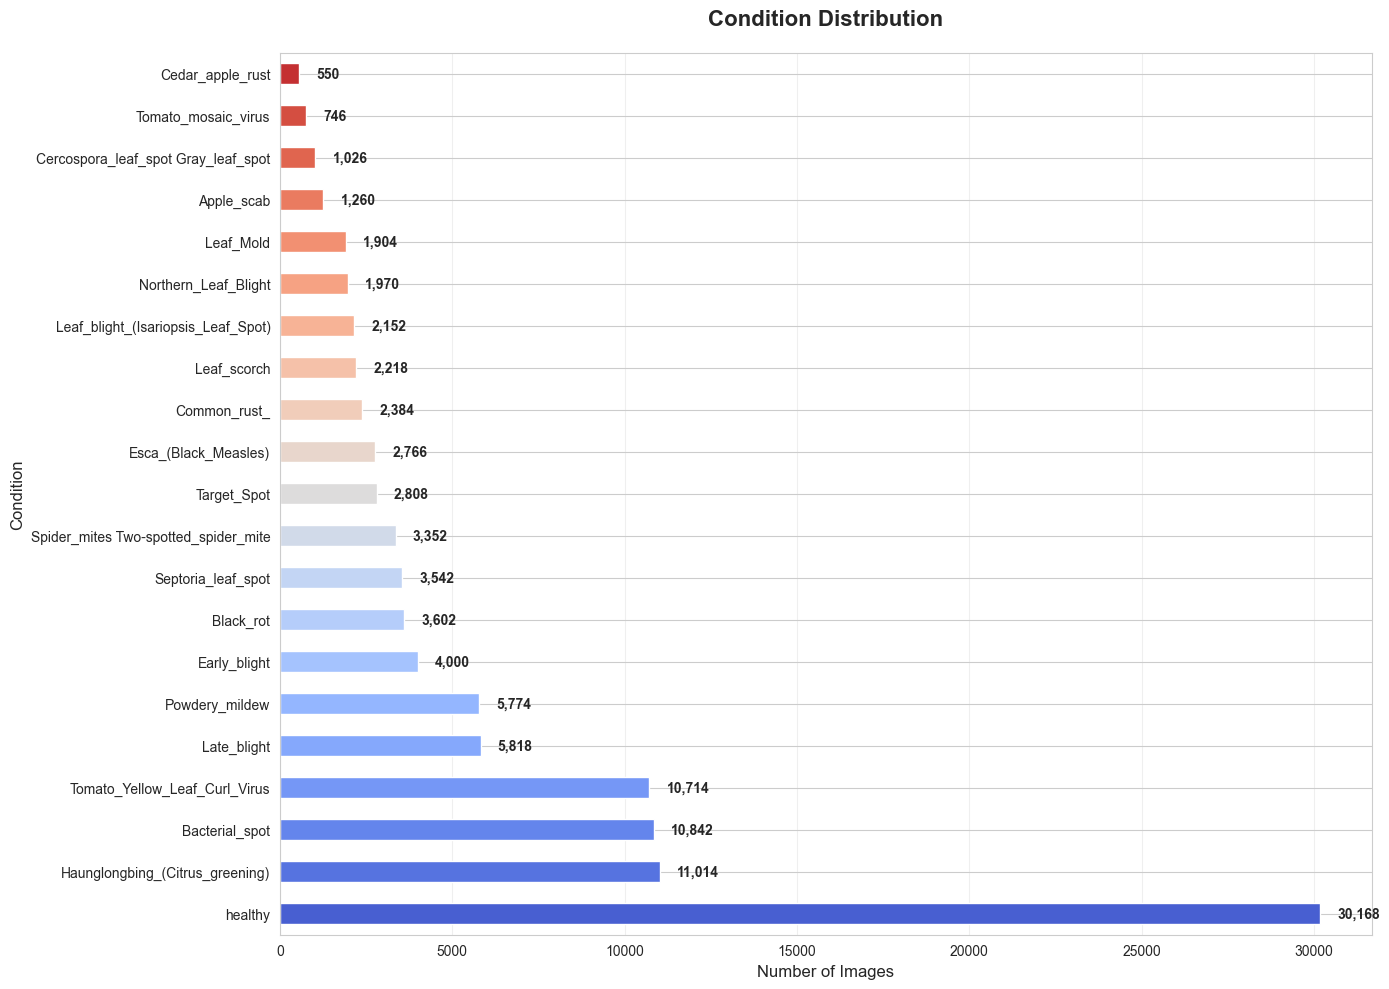

In [ ]:
# Visualize condition distribution
plt.figure(figsize=(14, 10))
colors_palette = sns.color_palette("coolwarm", len(condition_counts))
condition_counts.plot(kind='barh', color=colors_palette)
plt.title('Condition Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Condition', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(condition_counts):
    plt.text(v + 500, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Healthy vs Disease Distribution:
is_healthy
Disease/Other    78442
Healthy          30168
Name: count, dtype: int64


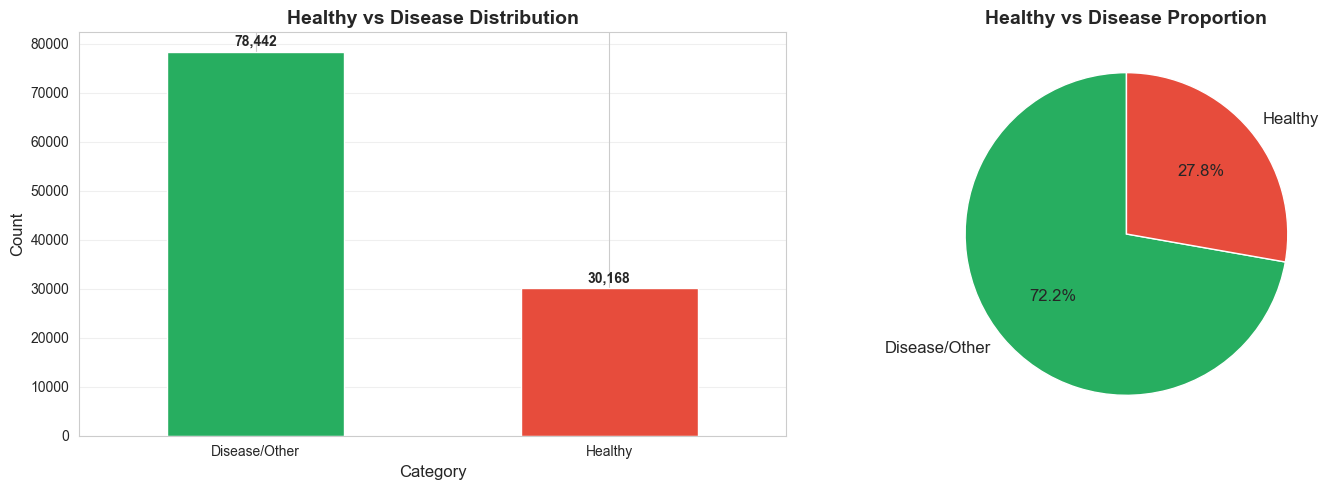

In [ ]:
# Healthy vs Disease distribution
df['is_healthy'] = df['condition'].apply(lambda x: 'Healthy' if x.lower() == 'healthy' else 'Disease/Other')
health_dist = df['is_healthy'].value_counts()

print("Healthy vs Disease Distribution:")
print(health_dist)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
health_dist.plot(kind='bar', ax=axes[0], color=['#27ae60', '#e74c3c'])
axes[0].set_title('Healthy vs Disease Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(health_dist):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#27ae60', '#e74c3c']
axes[1].pie(health_dist, labels=health_dist.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Healthy vs Disease Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [20]:
# Plant type by image type
plant_by_image_type = pd.crosstab(df['plant_type'], df['image_type'])
print("Plant Type by Image Type:")
print(plant_by_image_type)


Plant Type by Image Type:
image_type               color  grayscale
plant_type                               
Apple                     3171       3171
Blueberry                 1502       1502
Cherry_(including_sour)   1906       1906
Corn_(maize)              3852       3852
Grape                     4062       4062
Orange                    5507       5507
Peach                     2657       2657
Pepper,_bell              2475       2475
Potato                    2152       2152
Raspberry                  371        371
Soybean                   5090       5090
Squash                    1835       1835
Strawberry                1565       1565
Tomato                   18160      18160


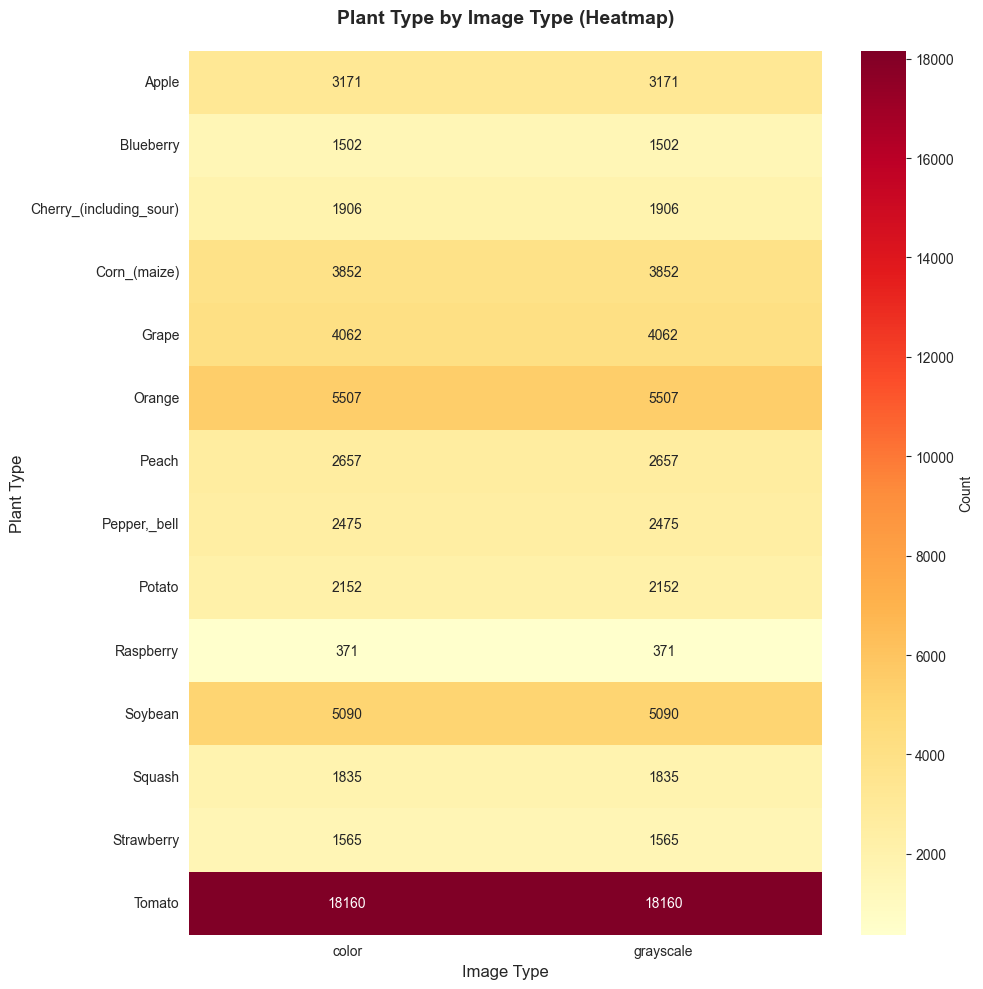

In [ ]:
# Heatmap of plant type by image type
plt.figure(figsize=(10, 10))
sns.heatmap(plant_by_image_type, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Plant Type by Image Type (Heatmap)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Image Type', fontsize=12)
plt.ylabel('Plant Type', fontsize=12)
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

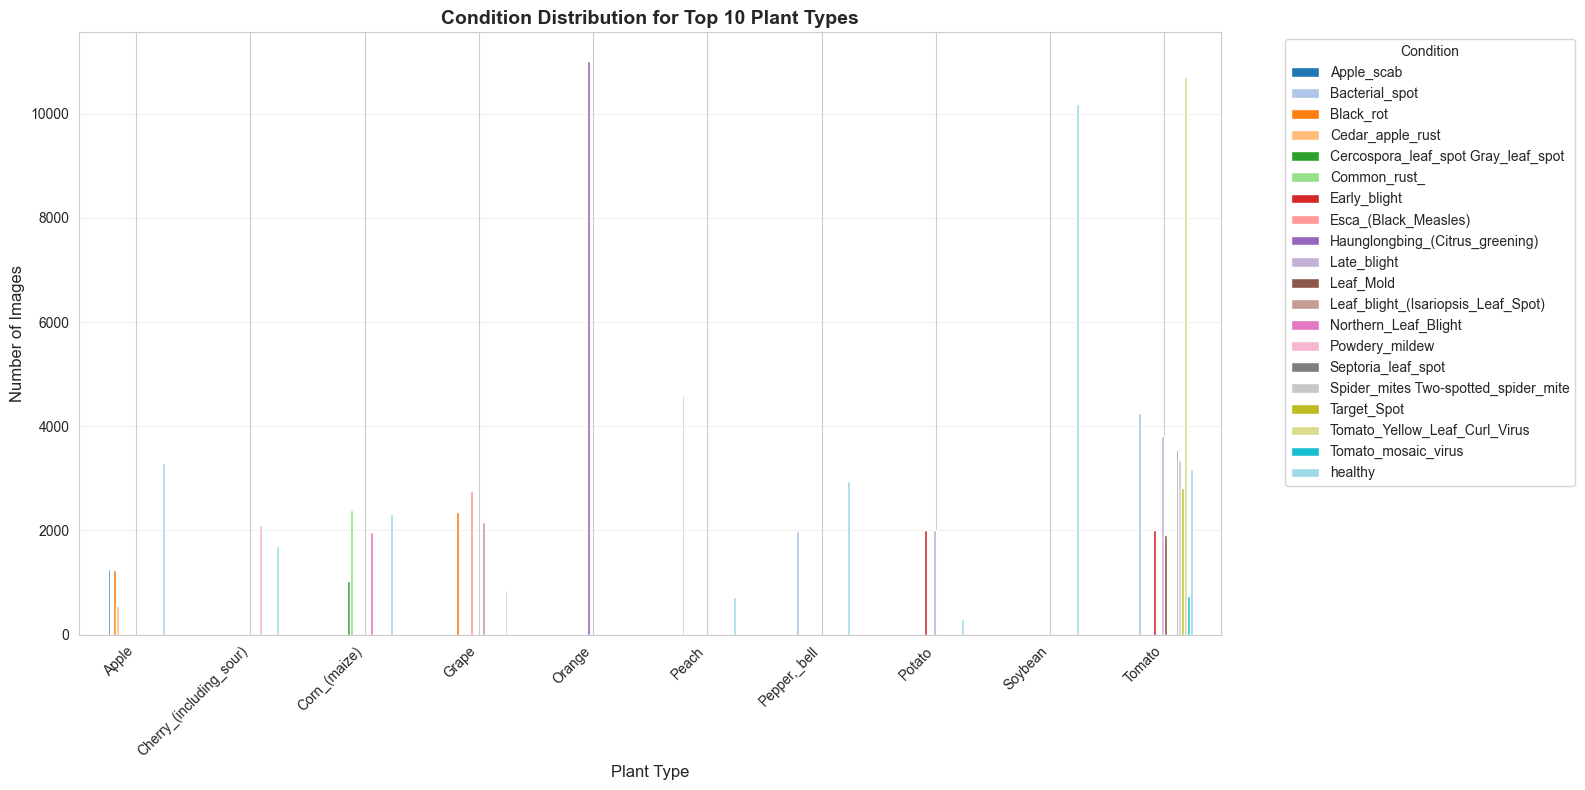

In [ ]:
# Filter out segmented to focus on color and grayscale for condition analysis
df_filtered = df[df['image_type'] != 'segmented']

# Plant type by condition (top 10 plants)
top_plants = plant_type_counts.head(10).index
df_top_plants = df_filtered[df_filtered['plant_type'].isin(top_plants)]

# Create a grouped bar chart
plt.figure(figsize=(16, 8))
plant_condition = pd.crosstab(df_top_plants['plant_type'], df_top_plants['condition'])
plant_condition.plot(kind='bar', figsize=(16, 8), colormap='tab20')
plt.title('Condition Distribution for Top 10 Plant Types', fontsize=14, fontweight='bold')
plt.xlabel('Plant Type', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

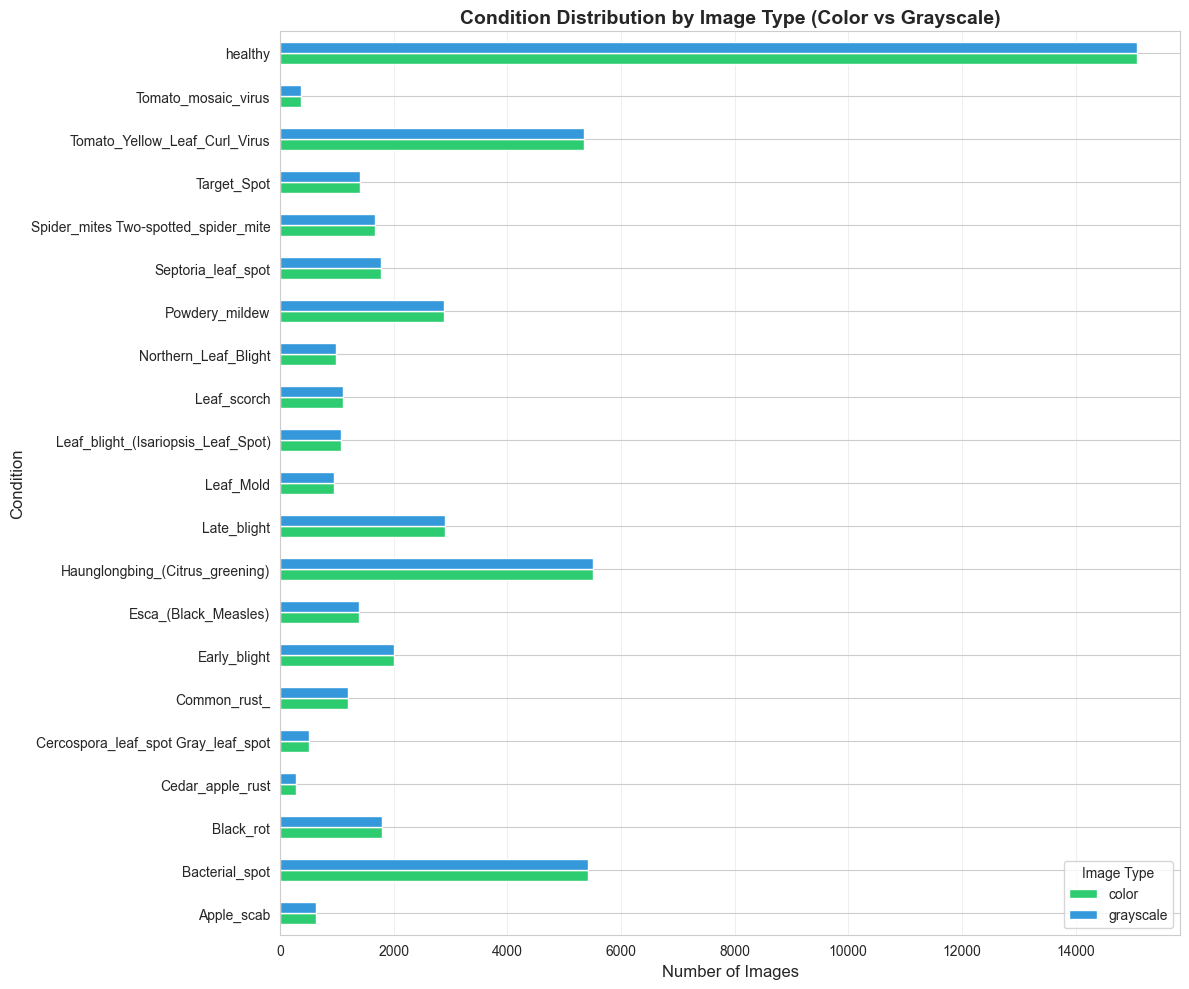

In [ ]:
# Image type distribution by condition (excluding segmented)
condition_by_image_type = pd.crosstab(df_filtered['condition'], df_filtered['image_type'])

plt.figure(figsize=(12, 10))
condition_by_image_type.plot(kind='barh', figsize=(12, 10), color=['#2ecc71', '#3498db'])
plt.title('Condition Distribution by Image Type (Color vs Grayscale)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Condition', fontsize=12)
plt.legend(title='Image Type')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics
print("="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"\nTotal number of images: {len(df):,}")
print(f"\nImage Types:")
for img_type, count in df['image_type'].value_counts().items():
    print(f"  - {img_type}: {count:,} ({count/len(df)*100:.1f}%)")

print(f"\nPlant Types:")
print(f"  - Total unique plant types: {df['plant_type'].nunique()}")
print(f"  - Most common: {plant_type_counts.index[0]} with {plant_type_counts.iloc[0]:,} images")
print(f"  - Least common: {plant_type_counts.index[-1]} with {plant_type_counts.iloc[-1]:,} images")

print(f"\nConditions:")
print(f"  - Total unique conditions: {df['condition'].nunique()}")
print(f"  - Healthy images: {health_dist['Healthy']:,} ({health_dist['Healthy']/len(df)*100:.1f}%)")
print(f"  - Disease/Other images: {health_dist['Disease/Other']:,} ({health_dist['Disease/Other']/len(df)*100:.1f}%)")

print("\n" + "="*80)


SUMMARY STATISTICS

Total number of images: 108,610

Image Types:
  - grayscale: 54,305 (50.0%)
  - color: 54,305 (50.0%)

Plant Types:
  - Total unique plant types: 14
  - Most common: Tomato with 36,320 images
  - Least common: Raspberry with 742 images

Conditions:
  - Total unique conditions: 21
  - Healthy images: 30,168 (27.8%)
  - Disease/Other images: 78,442 (72.2%)

